# Module imports

In [1]:
import time


import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh


import utils
import helpers as h

# loading data 

In [2]:
starting = time.time()
data = io.loadmat('/Users/duuta/ppp/data/stringer/natimg2800_M170714_MP032_2017-09-14.mat', simplify_cells=True)
#imgs_data = io.loadmat('/Users/duuta/darth-vader/NPDATAStore/stringerlab/images_natimg2800_all.mat', simplify_cells=True)


# figure 4

In [3]:
# arrays for data
alphas = np.arange(2, 5)
ns = 1+ np.arange(500) 
x = np.linspace(0, 2*np.pi, 1000)
x_eff = np.linspace(0, 2*np.pi, 5000)
x_lowd = np.linspace(0, 2*np.pi, 5000)

SHAPE = (2*ns.__len__(), x.__len__())

y_atw = np.empty(SHAPE)
y_at = np.empty(SHAPE)
y_af = np.empty(SHAPE)
y_ech = np.empty((5000, 5000))
y_ld = np.empty((5000, 5000))
    

# low-d tuning
for n in range(1, 5000):
    y_ld[n, :] = h.low_dim_tuning_curves(x_lowd, n)

# efficient coding
for i in range(x_eff.__len__()):
    y_ech[i, ] = h.cool_eff_tuning_curves(x_eff, i)


# cosines and sines 
for alpha in alphas:
    for n in range(SHAPE[0]//2):
        if alpha == 2:
            y_atw[n*2, :] = h.soul_tuning_curves(x, alpha, ns[n])  
            y_atw[n*2 + 1, :] = h.cool_tuning_curves(x, alpha, ns[n]) 
        if alpha == 3:
            y_at[n*2, :] = h.soul_tuning_curves(x, alpha, ns[n])
            y_at[n*2+1, :] = h.cool_tuning_curves(x, alpha, ns[n])
        if alpha == 4:
            y_af[n*2, :] =  h.soul_tuning_curves(x, alpha, ns[n])
            y_af[n*2 +1, :] =  h.cool_tuning_curves(x, alpha, ns[n])
            

# low dim tuning curves

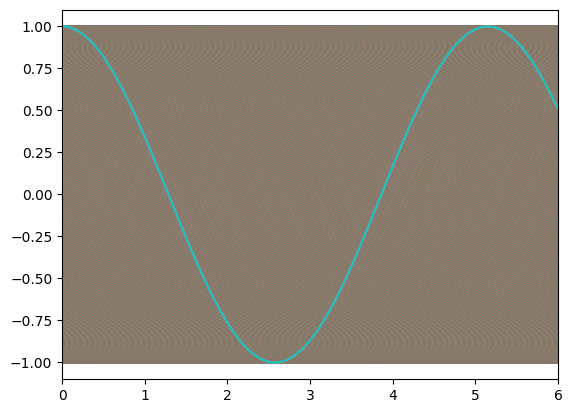

In [4]:
plt.plot(x_lowd, y_ld);
plt.xlim(0, 6)
plt.show()

# Random Projections of low-d tuning curves 

In [5]:
rp_ld = h.random_projections(y_ld)

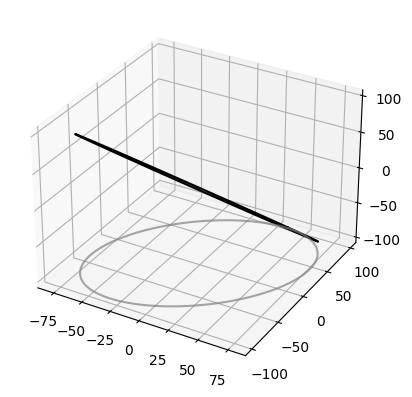

In [6]:
h.render_projections(rp_ld)

# eigenSpectrum of low-d simulations

In [7]:
#### 
start = time.time()
s0 = h.test_vars(y_ld)
end = time.time() - start
print(end)

38.25463795661926


In [8]:
stat = time.time()
s1 = h.compute_vars(y_ld)
en = time.time() - stat
print(en)

/Users/duuta/ppp/venv/lib/python3.9/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


21.107508897781372


In [37]:
h.get_alpha(s0, np.arange(11, 5e2).astype(int))

0.9183985344499355

In [39]:
h.get_alpha(s0, np.arange(10, 5e2).astype(int))

0.9544786361173859

In [10]:
h.get_alpha(s1, np.arange(10, 5e2).astype(int))

2.020920913814815

In [32]:
s1[::-1].sort()

In [35]:
s1

array([ 7.19394347,  1.15820313,  0.3094138 , ..., -0.05394311,
       -0.80349188, -6.80810841])

In [38]:
h.get_alpha(s1, np.arange(11, 5e2).astype(int))

1.9725562863321593

In [ ]:
# need to test these on the actual data sets.

/Users/duuta/ppp/notebooks/helpers.py:83: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10 ** 4)


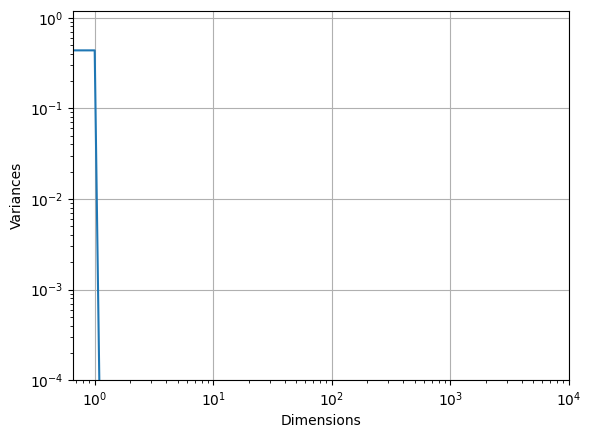

In [10]:
h.render_variances(s0)

In [27]:
h.get_alpha(s, np.arange(1, 6).astype(int))

5.864359325819266

# efficient coding 

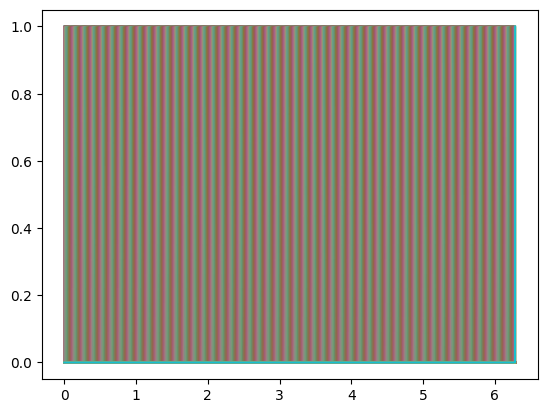

In [10]:
# efficient coding
for i in range(x_eff.__len__()):
    y_ech[i, ] = h.cool_eff_tuning_curves(x_eff, i)
plt.plot(x_eff, y_ech);

# random projections

In [13]:
rp_ech = h.random_projections(y_ech)

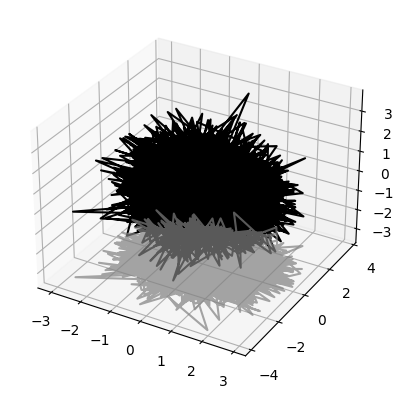

In [14]:
h.render_projections(rp_ech)

# Cosines + Sines with alpha = 2

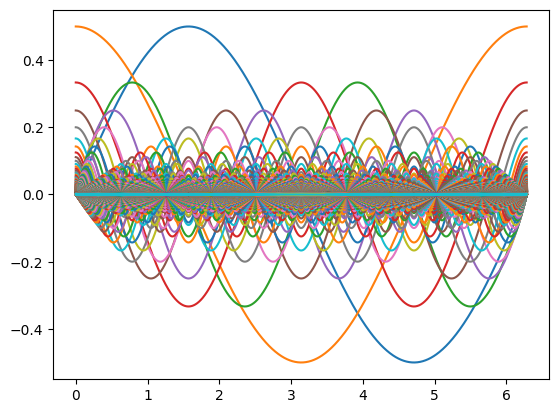

In [110]:
plt.plot(x, alpha_two.T)
plt.show()

In [114]:
# generate random basis
alpha2_basis = np.random.randn(3, 1000)

In [119]:
alpha2_pop = alpha2_basis @ alpha_two

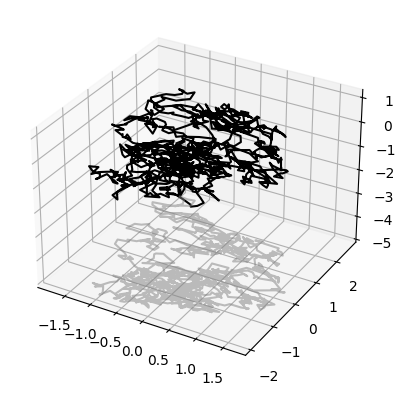

In [121]:
f = plt.figure()
ax=f.add_subplot(111, projection='3d')
ax.plot(alpha2_pop[0], alpha2_pop[1], alpha2_pop[2], color='black')
ax.plot(alpha2_pop[0], alpha2_pop[1], -5, color='gray', alpha=0.5)
plt.show()

In [122]:
# eigen Spectrum 
[u_alpha2, s_alpha2, v_alpha2] = np.linalg.svd(alpha_two)

/Users/duuta/darth-vader/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


(0.7079812002696424, 10000)

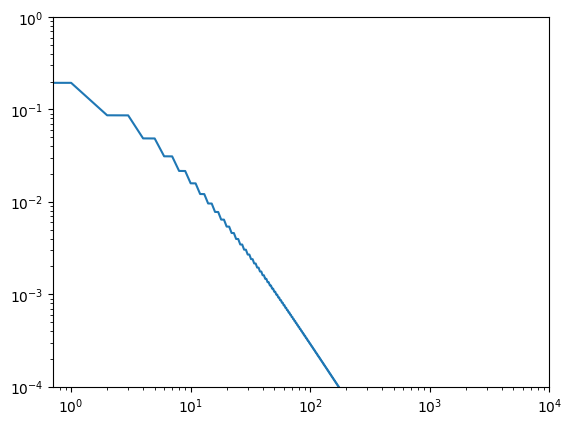

In [127]:
ss_alpha2 = np.square(s_alpha2)
ss_alpha2_sum = ss_alpha2.sum()

pss_alpha2 = ss_alpha2/ss_alpha2_sum

plt.loglog(pss_alpha2)
plt.ylim(10**-4, 10**0)
plt.xlim(0, 10**4)
plt.grid(True)

# cosine simulation alpha =3

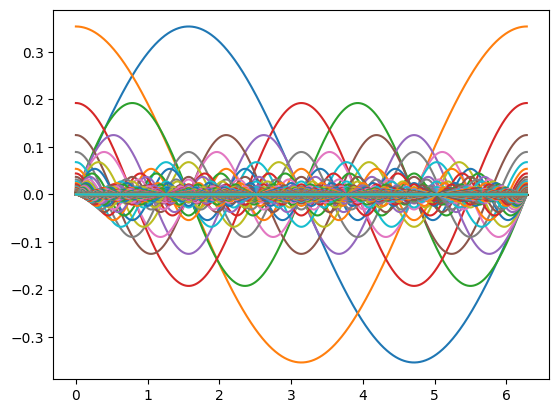

In [131]:
plt.plot(x, alpha_three.T);

# eigen spectrum 

In [134]:
 _,var_alpha3,_ = np.linalg.svd(alpha_three)

/Users/duuta/darth-vader/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


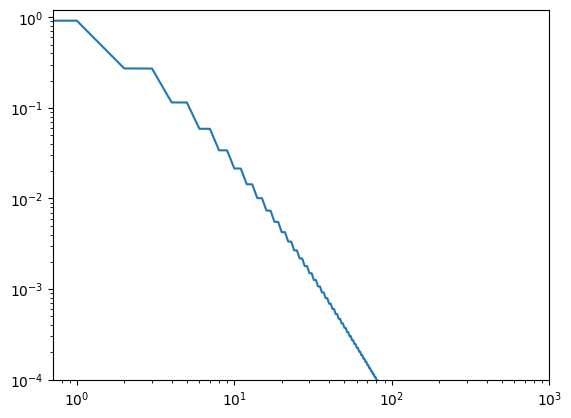

In [143]:
svar_alpha3 = (np.square(var_alpha3))/var_alpha3.sum()
plt.loglog(svar_alpha3)
plt.ylim(10**-4, 10**0 + 20e-2)
plt.xlim(0, 10**3)
plt.grid(True);

In [144]:
alpha_three.shape

(1000, 1000)

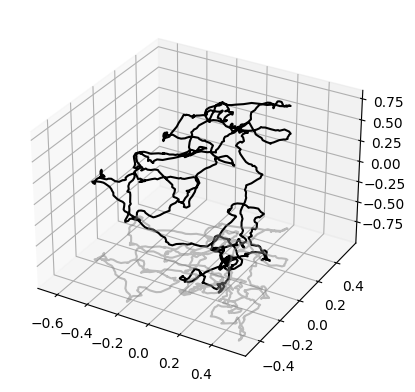

In [148]:
gen_alpha3_basis = np.random.randn(3, 1000)

alpha3_pop = gen_alpha3_basis @ alpha_three

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(alpha3_pop[0], alpha3_pop[1], alpha3_pop[2], color='black')
plt.plot(alpha3_pop[0], alpha3_pop[1], alpha3_pop[2].min(), color= 'grey', alpha=0.5 );

#  cosine & sine alpha = 4 

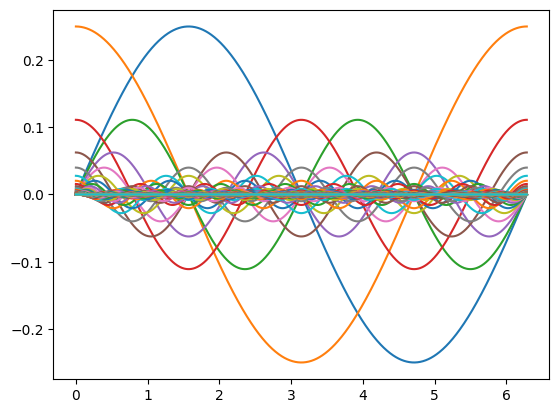

In [150]:
plt.plot(x, alpha_four.T);  

# eigenspectrum 

In [151]:
_, var_alpha4, _ = np.linalg.svd(alpha_four.T)

/Users/duuta/darth-vader/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


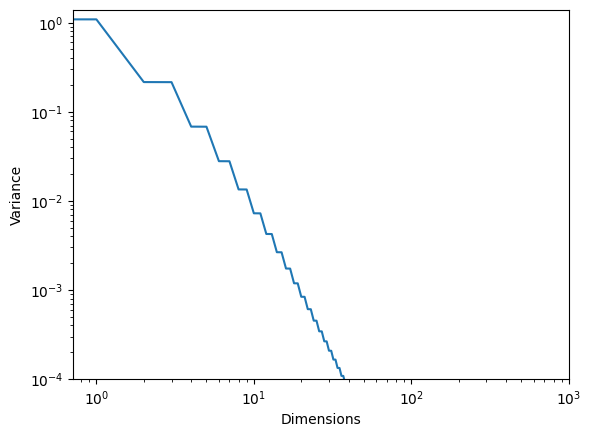

In [157]:
svar_alpha4 = np.square(var_alpha4)/var_alpha4.sum()


plt.loglog(svar_alpha4)
plt.ylim(10**-4, 10**0 + 40e-2)
plt.xlim(0, 10**3)
plt.ylabel('Variance')
plt.xlabel('Dimensions')
plt.grid(True);

# Projection alpha=4

In [ ]:
alpha4_gen_basis = np.random.randn(3, 1000)

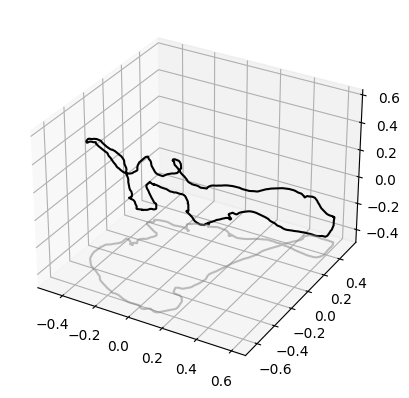

In [171]:
alpha4_pop = alpha4_gen_basis @ alpha_four 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(alpha4_pop[0], alpha4_pop[1], alpha4_pop[2], color='black')
ax.plot(alpha4_pop[0], alpha4_pop[1], alpha4_pop[2].min(), color='grey', alpha=0.5);

In [22]:
y=np.random.normal(0, 1, 333).reshape(1, -1)

In [23]:
y.shape

(1, 333)

In [40]:
60* 2800

168000

In [45]:
 * 2800 * 2.5

4200.0